# Convolution

We can always write an input signal as a product of the impulse shifted (time-reverse) by $k$ and the input signal itself.

$$x[n] = \sum_{k=-\infty}^{\infty}x[k]\delta[n-k]$$

Actually we could explain every signals by a linear transformation of the impulse so by linearity and time invariance, we could apply the transformation signal to input signal as:

$$\begin{equation} \begin{split}
y[n] &= \sum_{k=-\infty}^{\infty}x[k]h[n-k] \\
&= x[n] * h[n]
\end{split} \end{equation}$$

Ingredients:
* a sequence $x[m]$
* a second sequence $h[m]$

The recipies:
* time reverse
* at each step $n$ (from $-\infty$ to $\infty$)
   * center the time-reversed $h[m]$ in $n$
   * compute the inner product.
    
### Convolution properties
* linearity and time invariance
* commutativity $(x*h)[n] = (h*x)[n]$
* associativity for absolutely - and square-summable sequences:
$((x*h)*w)[n] = (x*(h*w))[n]$

# Filtering examples

* Moving avarage filter
* Leaky integrator

Typical filtering scenario: filter noise

## Denoising by Moving Average

**idea**: replace each sample by the local average
$y[n] = \frac{x[n] + x[n-1]}{2}$

**General**:
$$ y[n] = \frac{1}{M}\sum_{k=0}^{M-1}x[n-k]$$

### Moving Average: impulse response

$$
\begin{equation} \begin{split}
h[n] &= \frac{1}{M} \sum_{k=0}^{M-1}\delta[n-k] \\
&= \left\{ \begin{array}{11} 
1/M & \mbox{for } 0 \le n < M \\
0 & \mbox{otherwise}
\end{array} \right.
\end{split}
\end{equation}
$$ 

#### Analysis:
* smoothing effect proportional to M
* number of operations and storage also proportional to M

#### First-order recursion

$$
\begin{equation} \begin{split}
y_M[n] &= \frac{1}{M}(x[n] + x[n-1] + x[n-2] + \cdots + x[n-M+1]) \\
&= \frac{1}{M}x[n] + \frac{1}{M}(x[n-1] + x[n-2] + \cdots + x[n-M+1]) \\
\end{split}
\end{equation}
$$ 

The second term is almost $y_{M-1}[n-1]$

Formally:

$$y_M[n] =  \frac{1}{M}\sum_{k=0}^{M-1}x[n-k]$$

The Moving-Average of 1 point time-reverse is:
$$
\begin{equation} \begin{split}
y_M[n-1] &=  \frac{1}{M}\sum_{k=0}^{M}x[n-1-k] \\
&= \frac{1}{M}\sum_{k=0}^{M}x[n-(k+1)] \\
&= \frac{1}{M}\sum_{k=1}^{M}x[n-k] \\
\end{split}
\end{equation}
$$ 

The Moving-Average for the signal of $M-1$ points

$$y_{M-1}[n] = \frac{1}{M-1}\sum_{k=0}^{M-2}x[n-k]$$

If we try the same technique as above by delaying the input signal by 1 point, we have

$$y_{M-1}[n-1] =  \frac{1}{M-1}\sum_{k=1}^{M-1}x[n-k]$$

$$
\begin{equation} \begin{split}
\sum_{k=0}^{M-1}x[n-k] &= x[n] + \sum_{k=1}^{M-1}x[n-k] \\
M_{y_M}[n] &= x[n] + (M-1)y_{M-1}[n-1] 
\end{split}
\end{equation}
$$

So we arrange the term to get:

$$
\begin{equation} 
\begin{split}
y_M[n] = \lambda y_{M-1}[n-1] + (1-\lambda)x[n] \\
\mbox{for } \lambda = \frac{M-1}{M}
\end{split}
\end{equation}
$$


## The Leaky Integrator

* When $M$ is large, $y_{M-1}[n] \approx y_M[n]$ (and $\lambda \approx 1$)
* So we can rewrite the Moving Average as
$y[n] = \lambda y[n-1] + (1-\lambda)x[n]$

What is the Moving Average of the impulse response:

$y[n] = \lambda y[n-1] + (1-\lambda)\delta[n]$

* $y[n] = 0$ for all $n < 0$
* $y[0] = \lambda y[-1] + (1-\lambda)\delta[0] = (1-\lambda)$
* $y[1] = \lambda y[0] + (1-\lambda)\delta[1] = \lambda(1-\lambda)$
* $y[2] = \lambda y[1] + (1-\lambda)\delta[2] = \lambda^2(1-\lambda)$
* $y[3] = \lambda y[2] + (1-\lambda)\delta[3] = \lambda^3(1-\lambda)$

Populating the interactive namespace from numpy and matplotlib


<Container object of 3 artists>

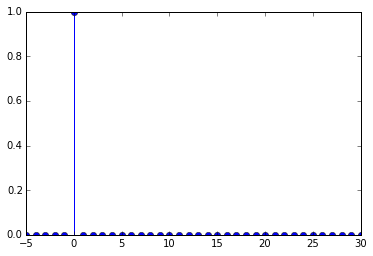

In [17]:
%pylab inline
impulse = vectorize(lambda n: 1 if (n == 0) else 0)
x = linspace(-5, 30, 36)
stem(x, impulse(x))

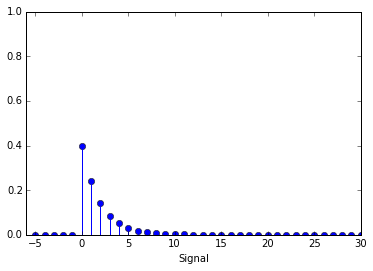

In [20]:
from IPython.html.widgets import interact, FloatSlider

def MovingAverage(lda, x):
    signal_size = x.size
    y = zeros(signal_size)
    y[0] = lda * x[0]
    for i in range(1, signal_size):
        y[i] = lda*y[i-1] + (1-lda)*x[i]
    return y

def stemMA(lambda_value): 
    stem(x, MovingAverage(lambda_value, impulse(x)))
    axis([-6, 30, 0, 1])
    xlabel('Signal')

interact(stemMA, 
         lambda_value=FloatSlider(min=0, max=1.0, step=0.05, value=0.5))

# Filter types according to impulse response

* Finite Impulse Response (FIR)
* Infinite Impulse Reponse (IIR)
* Causal
* Noncausal

## FIR

* Impulse response has finite support
* Only a finite number of samples are involved in the computation of each output sample

## IIR

* Impulse response has infinite support
* a potentially infinite number of samples are involved in the computation of each output sample.
* Surprisingly, in many cases the computation can still be performed in a finite amount of steps.

## Causal vs Noncausal

### Causal

* Impulse response is zero for $n < 0$
* only past samples (with response to the present) are involved in the computation of each output sample
* causal filters can work "on line" since they only need the past

### Noncausal

* Impulse response is nonzero for some (or all) $n < 0$
* can still be implemented in a offline fashion (when all input data is available on storage)

### Stability

* Key concept: avoid "explosions" if the input is nice
* A nice signal is a bounded signal $|x[n]| < M$ for all $n$
* Bounded-Input Bounded-Output (BIBO) stability: if the input is nice the output should be nice.

Hypotheses:

* $|x[n] < M$
* $\sum_n |h[n]| = L < \infty$

Thesis:

* $|y[n]| bounded$

### Good news

* FIR filters are always stable
* IIRs stable when $|\lambda| < 1$

$$
\begin{equation}
\begin{array}
\sum_{n=-\infty}^{\infty}|h[n]| &= |1-\lambda| \sum_{n=0}^{\infty}|\lambda|^n \\
&= \lim_{n \rightarrow \infty}|1 - \lambda| \frac{1 - |\lambda|^{n+1}}{1 - |\lambda|} \\
&< \infty \mbox{ for } |\lambda| < 1
\end{array}
\end{equation}
$$

# Frequency response

* Eigensequences
* Convolution theorem
* Frequency and phase response

## Convolution of $e^{j\omega_0 n}$

What if we take the convolution of a complex value with frequency $\omega_0$.

$$ \begin{equation} \begin{split}
y[n] &= e^{j\omega_0 n} * h[n] \\
&= h[n] * e^{j\omega_0 n} \\
&= \sum_{k=-\infty}^{\infty}h[k]e^{j\omega_0(n-k)} \\
&= e^{j\omega_0 n} \sum_{k=-\infty}^{\infty}h[k]e^{-j\omega_0 k} \\
&= e^{j\omega_0 n} H(e^{j\omega_0 n})
\end{split} \end{equation}
$$

The sum is the DTFT calculated at $\omega_0$

THe first fundamental property
* The linear transform doesn't change the frequency of the input
* Complex exponentials are eigensequences of LTI systems.
* DTFT of impulse response determines the frequency characteristics of a filter.

## Magnitude and Phase

If $H(e^{j\omega_0}) = Ae^{j\theta}$ then $\mathbb{H}\{e^{j\omega_0 n}\} = Ae^{j(\omega_0 n + \theta)}$

Applitude:
* amplification ($A > 1$)
* attenuation ($0 \le A < 1$)

Phase shift:
* delay ($\theta < 0$)
* advancement ($\theta > 0$)

The convolution theorem


$$ \begin{equation} \begin{split}
DTFT\{x[n]*h[n]\} &= \sum_{n=-\infty}^{\infty}(x*h)[n]e^{-j\omega n} \\
&= \sum_{n=-\infty}^{\infty} \sum_{k=-\infty}^{\infty}x[k]h[n-k]e^{-j\omega n} \\
&= \sum_{n=-\infty}^{\infty} \sum_{k=-\infty}^{\infty}x[k]h[n-k]e^{-j\omega k} e^{-j\omega (n-k)} \\
&= \sum_{k=-\infty}^{\infty}x[k] e^{-j\omega k} \sum_{n=-\infty}^{\infty}h[n-k] e^{-j\omega (n-k)} \\
&= H(e^{j\omega}) X(e^{j\omega})
\end{split} \end{equation}
$$

The fourier transform of impulse response is called Frequency reponse.

$$H(e^{j\omega}) = DTFT\{h[n]\}$$

Two effects:
* **magnitude**: amplification ($|H(e^{j\omega})| > 1$) or attentuation ($|H(e^{j\omega})| < 1$)
* **phase** overall delay and shape changes

# Ideal Filters

Filter types according to magnitude response
* Lowpass: low frequency left, kill everything else
* Highpass: high frequency left
* Bandpass: band frequency left

Filter types according to phase response
* Linear phase
* non-linear phase

### Ideal lowpass filter
$$ 
H(e^{j\omega}) = \left\{ \begin{equation} \begin{array}{11}
1 & \mbox{for } |\omega| \le \omega_c \\
0 & \mbox{ otherwise }
\end{array}
\end {equation} \right.
$$

* perfectly flat passband
* infinite attenuation in stopband
* zero-phase (no delay)

#### Lowpass filter: impulse response

$$
\begin{equation} \begin{array}
h[n] &= IDTFT\{ H(e^{j\omega}) \} \\
&= \frac{1}{2\pi}\int_{-\pi}^{\pi}H(e^{j\omega})e^{j\omega n}d\omega \\
&= \frac{1}{2\pi}\int_{-\omega_c}^{\omega_c}H(e^{j\omega})e^{j\omega n}d\omega \\
&= \frac{1}{\pi n} \frac{e^{j\omega_c n} - e^{-j\omega_c n}}{2j} \\
&= \frac{sin\omega_c n}{\pi n} \\
\end{array} \end{equation}
$$

For example we want to calculate $sinc$ for $\omega_c = \pi/3$

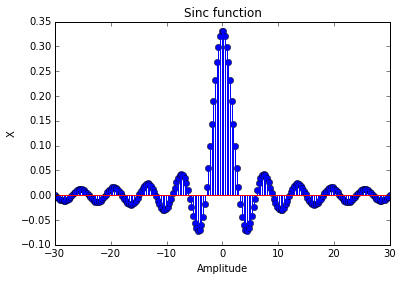

In [49]:
import numpy as np
import math as m
from scipy import constants as c

n = np.linspace(-30, 30, 200)
f = 1/3*np.sinc(n/3)
stem(n, f)
title('Sinc function')
xlabel('Amplitude')
ylabel('X')

<Container object of 3 artists>

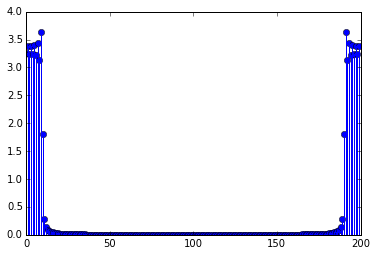

In [57]:
Xej = np.fft.fft(f)
stem(abs(Xej))

# Numerical Examples: Linear time invariant systems

## Linearity

We use the command to calculate the convolution between the input x and the impulse response h. Notice that the command uses only the available data without zero padding them.

`y = np.convolve(x,h,'valid')`

In constrast with what is done by

`y = np.convolve(x,h)`

When using only available data in performing a convolution between a sequence $x$ of length $M$ and a sequence $h$ of length $L$, the convolution expression using only the available data can be written as:

if $M > L, \mbox{   } y[n] = \sum_{l=1}^L h[l]x[n-l], \mbox{   } n = L + 1, \cdots, M$

if $L > M, \mbox{   } y[n] = \sum_{m=1}^M x[m]h[n-m], \mbox{   } n = M + 1, \cdots, L$

The resulting signal is of length:

$max(M - max(0, L-1), 0)$

For example, let's consider a system where its impulse response is given by $h[n] = \alpha^n u[n]$, and $u[n]$ is the step function. The convolution could be calculated as below

In [21]:
%pylab inline

alpha = 0.999
h = pow(alpha, np.arange(100))
y = np.linspace(0, 999, 1000)
x1 = np.sin((y*2*c.pi*40)/1000)
y1 = np.convolve(x1, h, 'valid')

Populating the interactive namespace from numpy and matplotlib


The dimension of $y1$ is 901 samples. We could plot the input $x1$ and $y1$ to see the effect of the system.

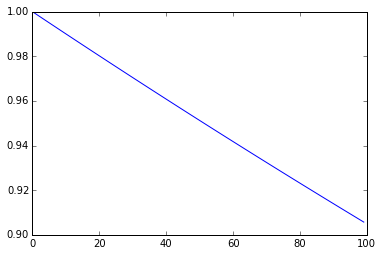

In [34]:
plot(h)

(-2, 2)

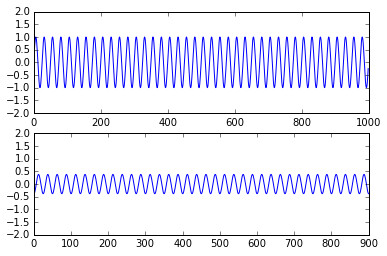

In [33]:
figure(1)
subplot(211)
plot(y, x1)
ylim([-2, 2])
subplot(212)
plot(y1)
ylim([-2, 2])

In [38]:
class Leaky(object):
    def __init__(self, lmb):
        self.lmb = lmb
        self.y = 0
    def compute(self, x):
        res = []
        for v in x:
            self.y = self.lmb * self.y + (1 - self.lmb)*v
            res.append(self.y)
        return res
            
L = Leaky(0.95)
L.compute([0,0,0,0,1,0,0,0,0,0,0])

[0.0,
 0.0,
 0.0,
 0.0,
 0.050000000000000044,
 0.04750000000000004,
 0.04512500000000004,
 0.04286875000000004,
 0.040725312500000034,
 0.03868904687500003,
 0.036754594531250025]

## Denoising with the Leaky Integrator

### Two simple tones

Consider a Leaky Integrator filter of order 10. As seen on the filtering lecture, the corresponding impulse response is given by $h[n] = (1-\lambda)\lambda^n u[n]$, where $n = (10-1)/10 = 0.9$

In [58]:
M = 10
lbd = float(M-1)/float(M)
h = (1-lbd)*pow(lbd, np.arange(100)) 
# constructs the impulse response of the system of length 100

Generate now a Gaussian white noise (sequence of independent random numbers that are generated according to the same Gaussian distribution)

In [59]:
sigma2 = 0.1
noise = sigma2*np.random.randn(2000)

That we add to the sequence of two pulse $x1$ and $x2$ that we have used in the examples "three tones" of the Fourier module, that is

In [60]:
x1 = np.sin((y*2*c.pi*40)/1000)
x2 = np.sin((y*2*c.pi*80)/1000)
x = np.append(x1, x2)
xNoisy = noise + x

We can plot x and xNoisy to see the effect of the noise

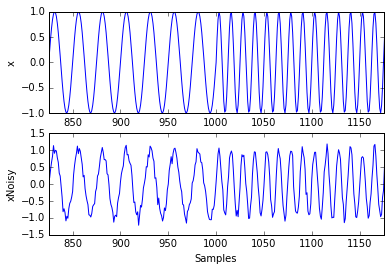

In [61]:
subplot(2,1,1)
plot(np.arange(x.size), x)
ylabel('x')
xlim([825, 1175])
subplot(2,1,2)
plot(np.arange(xNoisy.size), xNoisy)
xlabel('Samples')
ylabel('xNoisy')
xlim([825, 1175])
show()

We now apply the leaky integrator to the noisy signal

(750, 1050)

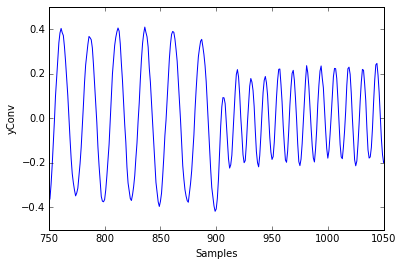

In [63]:
yConv = np.convolve(xNoisy, h, 'valid')
plot(np.arange(yConv.size), yConv)
xlabel('Samples')
ylabel('yConv')
xlim([750, 1050])

### Jingle!

So let's now apply our denoising method to a human voice signal. Load the file jingle.mat into Python using the command

In [66]:
import scipy.io as sio
mat_contents = sio.loadmat('jingle.mat')
jingle = mat_contents['jingle']
print(mat_contents)

{'__version__': '1.0', 'jingle': array([[ 0.        ,  0.        ,  0.        , ..., -0.01513672,
        -0.01254272, -0.01034546]]), '__header__': b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Tue Feb  5 21:22:28 2013', '__globals__': [], 'Fs': array([[44100]], dtype=uint16)}


By typing _whos_ you get the following line as well as many others.

We now create a white noise signal to add to jingle

In [69]:
sigma = 0.01
noise = sigma * np.random.randn(255000)
jingleNoisy = jingle + noise
jingleNoisy = jingleNoisy.reshape(255000,)

## The convolution theorem & frequency response of filters

The convolution theorem tells us that the Fourier transofrm of the convolution between two sequences is equal to the product of the Fourier transform of the two products.

Working with the finite sequences, we need to be careful on the choice of the length of the Fourier transform. We will use here the command for a K point fft.

`scipy.fftpack.fft(X, K)`

When convoluting a sequence of $x$ of length $N$ with a sequence $h$ of length $L < N$

`y = np.convolve(x, h, 'valid')`

the result is of length $N - L + 1$

Therefore we will consider $N - L + 1$ point FFT

### two tones again

Let's take our noisy two tones xNoisy (length $N = 2000$), the Leaky Integrator filter $h$ (length $L = 100$), and plot their spectral content, that is, the absolute value of their Fourier transform:

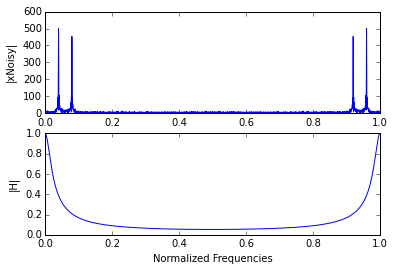

In [75]:
#  Construct the impulse response of the system of length 100
import numpy as np
import math as m
from scipy import constants as c
M = 10
lbd = float((M-1))/float(M)
h = (1-lbd)*pow(lbd,np.arange(100))

#  Generate two tones
y = np.linspace(0,999,1000)
x1 = np.sin((y*2*c.pi*40)/1000)
x2 = np.sin((y*2*c.pi*80)/1000)
x = np.append(x1,x2)

# Generate the noise
sigma3 = 0.1
noise = sigma3 * np.random.randn(2000)

# Add noise to signal
xNoisy = x + noise

N = len(xNoisy)
L = len(h)

# DFT/DFS of noisy signal and impulse response
from scipy import fftpack as f
XNoisy = f.fft(xNoisy, N - L + 1)
H = f.fft(h, N - L + 1)

# To plot vs the normalized frequencies
normFrequ = np.arange(N - L + 1, dtype=float)/(float(N-L+1))

subplot(2,1,1)
plot(normFrequ, abs(XNoisy))
xlabel('Normalized Frequencies')
ylabel('|xNoisy|')
subplot(2,1,2)
plot(normFrequ, abs(H))
xlabel('Normalized Frequencies')
ylabel('|H|')
show()

The absolute value of the product (samplewise) of the two Fourier transforms is computed as

In [76]:
ABS = H * XNoisy

The plot of the absolute value of the product of the two Fourier transforms

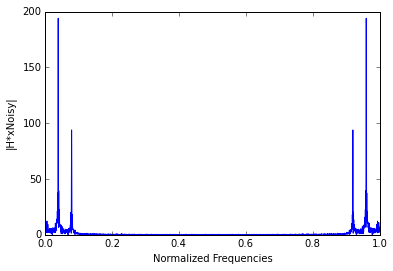

In [77]:
plot(normFrequ, abs(ABS))
xlabel('Normalized Frequencies')
ylabel('|H*xNoisy|')
show()